### Importing libraries

In [1]:
import requests
import time
from datetime import datetime
import matplotlib.pyplot as plt 

### Get user input on which subreddit to parse

In [2]:
subreddit = input("What subreddit do you want to check?")

What subreddit do you want to check?gis


### Function for getting the count

In [3]:
def get_active_users(subreddit):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0'}
    data = requests.get('https://www.reddit.com/r/{}/about.json'.format(subreddit), headers=headers).json()
    active_user_count = data['data']['active_user_count']
    return active_user_count

### Let user specify the timeframe

In [4]:
number_of_inputs = int(input("How many measurments do you want?"))
time_interval = int(input("What do you want the time interval to be? (60 = one minute)"))

How many measurments do you want?4
What do you want the time interval to be? (60 = one minute)2


### Run the function repeatedly over the specified timeframe


In [5]:
now = datetime.now()
current_hour = now.strftime("%H:%M:%S")

user_per_hour = {  # defining a dictionary to store the results in
}

while len(user_per_hour) < number_of_inputs:
    now = datetime.now()
    current_hour = now.strftime("%H:%M:%S")
    time.sleep(time_interval)
    currently_users = get_active_users(subreddit)
    user_per_hour.update( {current_hour : currently_users} )
    print(user_per_hour)

print(user_per_hour)

{'19:19:47': 169}
{'19:19:47': 169, '19:19:50': 169}
{'19:19:47': 169, '19:19:50': 169, '19:19:53': 169}
{'19:19:47': 169, '19:19:50': 169, '19:19:53': 169, '19:19:56': 169}
{'19:19:47': 169, '19:19:50': 169, '19:19:53': 169, '19:19:56': 169}


## Plot the results

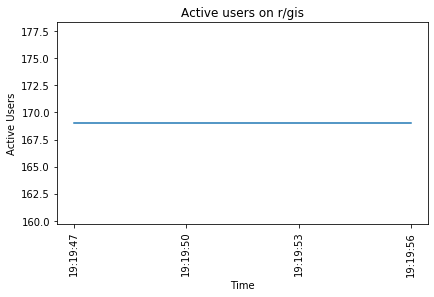

In [6]:
plt.plot(*zip(*sorted(user_per_hour.items())))
plt.tight_layout()
plt.xticks(rotation=90)
plt.title(f"Active users on r/{subreddit}", loc='center')
plt.xlabel('Time')
plt.ylabel('Active Users')
plt.gcf().subplots_adjust(bottom=0.2, top=0.9, left=0.1) # adjusting the plotting area
plt.savefig(f"{subreddit}_users_graph.png")
plt.show()